# 1. Reduce the number of Device Statistics to Estimate the Service Metric

The goal of this task is to reduce the number of device statistics X needed for accurately estimating Y. Since set of size n has $2^n$ subsets, finding a minimal of X that allows to predict Y with smallest error for specific learning method is generally not feasible. 

You will use three heuristic methods to achieve this task. 

1) Construct a training set and test set from the trace as above. 

2) Method 1: Build subsets of the feature set X that contain either one, two and three features (i.e., device statistics). Compute the medels for each of these sets for linear regression over the training set. Plot a histogram of the error values (NMAE) of all models for the test set. Identify the feature set that produces the model with the smallest error and give the device statistic(s) in this set.

***(Optional) In this part, you can Compute models for all subset of X and sort them by computing error(NMAE) and give the feature set for smallest error. Produce box plot which shows the NMAE versus the number of features (1 to 10).***

3) Method 2: Linear univariate feature selection. Take each feature of X and compute the sample correlation of the feature with the corresponding Y value the training set. For observation $x_i$,$y_i$, the sample correlation is computed as $\frac{1}{m}\sum\limits_{i=1}^{m}(x_i-\bar{x})(y_i-\bar{y})/(\sigma_X * \sigma_Y)$ whereby $\bar{x}$ and $\bar{y}$ are sample means and m is the size of the training set; $\sigma_X$ is the standard deviation $\sqrt(\frac{1}{m}\sum\limits_{i=1}^{m}(x_i-\bar{x})^2)$ and likewise for $\sigma_Y$. The correlation values fall into the interval [-1,+1]. Rank the feature according to the square of the correlation values; the top feature has the highest value. Build nine feature sets comosed of the top k features, k = 1..9. Compute the model for each of these nine sets for linear regression over the training set and compute the error (NMAE) of these models over the test set. Produce a plot that shows the error value in function of the set k. After computing correlation matrix for all features and video frame rate, use heat map plot to show dependencies among features and Video Frame Rate.


4) Method 3: Using L1 Regularization (Lasso). The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights.
Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. In mathematical notion, if $\hat{y}$ is the predicted value 

$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$. The objective function to minimize is:

$$\underset{w}{min\,} { \frac{1}{2n} ||\hat{y} - y||_2 ^ 2 + \alpha ||w||_1}$$

where n is the number of samples and w is the vector of weights.

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1-norm$ of the parameter vector [1]. Use this method to decrease some weights to zero in your model (features which have zero weight does not effect the model).

5) Compare these three methods and explain advantages and disadvantages of each method.  


The following link gives more information about feature selection and it explain functions for feature selection in scikit learn tool.

[1] http://scikit-learn.org/stable/modules/linear_model.html

http://scikit-learn.org/stable/modules/feature_selection.html

### Guid

You can use the following function to generate subsets of S set with the number of m features. 

In [21]:
import time
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from scipy.special import comb

# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

#create frames with selected columns
X_features = ['plist-sz', 'totsck','ldavg-1','pgfree/s','proc/s',
              'all_%%usr','file-nr','cswch/s','%%memused','runq-sz']
Y_features = ['DispFrames']

#concatenate X[X_features], Y[Y_features] along a particular axis=1, a DataFrame is returned.
#Combine DataFrame objects horizontally along the x axis by passing in axis=1.
#(axis=0, a Series is returned)
XY = pd.concat([X[X_features], Y[Y_features]], axis=1)

# Producing training set and test set
train, test = train_test_split(XY, test_size = 0.3)

# Sort the train and test sets
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
X_train = train[X_features]
X_test = test[X_features]
Y_train = train['DispFrames']
Y_test = test['DispFrames']

#start counting time
start_1 = time.time()

#Do linear regression
regr = linear_model.LinearRegression()

#Define the function to find all subsets for each situation
def findsubsets(S,m):
    #Return m length subsequences of elements from the input S.
    return list(itertools.combinations(S,m))

#first create a list to hold all the name of combinations.
train_subsets = [None]*10

#Use loop to create the subsets for all kinds of features and put into the list
for y in range(1,10):
    train_subsets[y] = findsubsets(X_features,y)

print("Train the linear regression using only 1 feature in X set:")

#first create a empty list for NMAE
NMAE_1 = [None]*10

#create a loop of ten times
for j in range(0, 10):
    
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[1][j])]
    test_reshape = X_test[list(train_subsets[1][j])]
    
    #fit linear regression
    regr.fit(train_reshape,Y_train)
    print("Coefficients (using "+str(train_subsets[1][j])+") :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_1[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_1[j])


Train the linear regression using only 1 feature in X set:
Coefficients (using ('plist-sz',)) : [-0.01698467]
NMAE for the test set: 0.108
Coefficients (using ('totsck',)) : [-0.03428482]
NMAE for the test set: 0.109
Coefficients (using ('ldavg-1',)) : [-0.09209163]
NMAE for the test set: 0.109
Coefficients (using ('pgfree/s',)) : [3.7619116e-05]
NMAE for the test set: 0.248
Coefficients (using ('proc/s',)) : [-0.1347288]
NMAE for the test set: 0.247
Coefficients (using ('all_%%usr',)) : [-0.16561227]
NMAE for the test set: 0.192
Coefficients (using ('file-nr',)) : [-0.02235008]
NMAE for the test set: 0.136
Coefficients (using ('cswch/s',)) : [-0.00019577]
NMAE for the test set: 0.137
Coefficients (using ('%%memused',)) : [-1.58475536]
NMAE for the test set: 0.194
Coefficients (using ('runq-sz',)) : [-0.11885236]
NMAE for the test set: 0.117


In [22]:
print("Train the linear regression using 2 feature in X set:")
NMAE_2 = [None]*45
for j in range(0, 45):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[2][j])]
    test_reshape = X_test[list(train_subsets[2][j])]
    
    #fit linear regression
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[2][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_2[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_2[j])
    print('----------------------------------')

Train the linear regression using 2 feature in X set:
['plist-sz', 'totsck']
Coefficients : [-0.02143584  0.00900984]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', 'ldavg-1']
Coefficients : [-0.01630947 -0.0038588 ]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', 'pgfree/s']
Coefficients : [-1.68036925e-02  6.82120726e-06]
NMAE for the test set: 0.106
----------------------------------
['plist-sz', 'proc/s']
Coefficients : [-0.01689833 -0.01041525]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', 'all_%%usr']
Coefficients : [-0.01817664  0.02455855]
NMAE for the test set: 0.107
----------------------------------
['plist-sz', 'file-nr']
Coefficients : [-0.01383734 -0.00534754]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'cswch/s']
Coefficients : [-1.55069406e-02 -2.24515751e-05]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', '%%memused']


In [23]:
print("Train the linear regression using 3 feature in X set:")
NMAE_3 = [None]*120
for j in range(0, 120):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[3][j])]
    test_reshape = X_test[list(train_subsets[3][j])]
    
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[3][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_3[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_3[j])
    print('----------------------------------')

Train the linear regression using 3 feature in X set:
['plist-sz', 'totsck', 'ldavg-1']
Coefficients : [-0.02056476  0.00846724 -0.00344625]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', 'totsck', 'pgfree/s']
Coefficients : [-1.32957036e-02 -7.06877691e-03  7.41577986e-06]
NMAE for the test set: 0.106
----------------------------------
['plist-sz', 'totsck', 'proc/s']
Coefficients : [-0.02188552  0.0101034  -0.01092585]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', 'totsck', 'all_%%usr']
Coefficients : [-0.01566664 -0.00514701  0.02523422]
NMAE for the test set: 0.107
----------------------------------
['plist-sz', 'totsck', 'file-nr']
Coefficients : [-0.01201479 -0.00364794 -0.00538211]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'totsck', 'cswch/s']
Coefficients : [-2.37608821e-02  1.69604587e-02 -2.43521818e-05]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', '

['ldavg-1', 'all_%%usr', '%%memused']
Coefficients : [-0.11357145  0.02206667  0.53737241]
NMAE for the test set: 0.111
----------------------------------
['ldavg-1', 'all_%%usr', 'runq-sz']
Coefficients : [-0.05307103  0.04953657 -0.07280664]
NMAE for the test set: 0.105
----------------------------------
['ldavg-1', 'file-nr', 'cswch/s']
Coefficients : [-6.18084868e-02 -5.87421803e-03 -2.82547376e-05]
NMAE for the test set: 0.107
----------------------------------
['ldavg-1', 'file-nr', '%%memused']
Coefficients : [-0.08740927 -0.00569612  0.50324505]
NMAE for the test set: 0.109
----------------------------------
['ldavg-1', 'file-nr', 'runq-sz']
Coefficients : [-0.03911793 -0.00537041 -0.04838435]
NMAE for the test set: 0.107
----------------------------------
['ldavg-1', 'cswch/s', '%%memused']
Coefficients : [-9.91747958e-02 -1.91119004e-05  4.93323674e-01]
NMAE for the test set: 0.113
----------------------------------
['ldavg-1', 'cswch/s', 'runq-sz']
Coefficients : [-5.4366394

In [24]:
print("Train the linear regression using 4 feature in X set:")
NMAE_4 = [None]*210
for j in range(0, 210):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[4][j])]
    test_reshape = X_test[list(train_subsets[4][j])]
    
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[4][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_4[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_4[j])
    print('----------------------------------')

Train the linear regression using 4 feature in X set:
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s']
Coefficients : [-1.29883316e-02 -7.17092783e-03 -1.47733674e-03  7.35561333e-06]
NMAE for the test set: 0.106
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'proc/s']
Coefficients : [-0.02104958  0.00957713 -0.00329507 -0.01085114]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'all_%%usr']
Coefficients : [-0.0129608  -0.0075091  -0.00924307  0.02685056]
NMAE for the test set: 0.106
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'file-nr']
Coefficients : [-0.01495953 -0.00272993  0.01668047 -0.00610848]
NMAE for the test set: 0.104
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'cswch/s']
Coefficients : [-2.51928001e-02  1.83405019e-02  4.97458625e-03 -2.61801722e-05]
NMAE for the test set: 0.108
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', '%%memus

['plist-sz', 'pgfree/s', 'proc/s', '%%memused']
Coefficients : [-1.96285971e-02  8.73956326e-06 -5.67273448e-03  5.72278264e-01]
NMAE for the test set: 0.107
----------------------------------
['plist-sz', 'pgfree/s', 'proc/s', 'runq-sz']
Coefficients : [-1.36213931e-02  8.57939897e-06 -1.11984743e-02 -2.31529162e-02]
NMAE for the test set: 0.105
----------------------------------
['plist-sz', 'pgfree/s', 'all_%%usr', 'file-nr']
Coefficients : [-1.51278354e-02 -1.63215480e-06  2.48256163e-02 -5.27573362e-03]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'pgfree/s', 'all_%%usr', 'cswch/s']
Coefficients : [-1.45287196e-02 -7.82216242e-06  1.17434199e-01 -1.27064892e-04]
NMAE for the test set: 0.100
----------------------------------
['plist-sz', 'pgfree/s', 'all_%%usr', '%%memused']
Coefficients : [-2.07674247e-02  4.06717864e-06  2.01929036e-02  5.69880651e-01]
NMAE for the test set: 0.106
----------------------------------
['plist-sz', 'pgfree/s', 'all_%%

['totsck', 'pgfree/s', 'all_%%usr', '%%memused']
Coefficients : [-4.14014968e-02  7.61732212e-06  1.97933158e-02  5.38680882e-01]
NMAE for the test set: 0.106
----------------------------------
['totsck', 'pgfree/s', 'all_%%usr', 'runq-sz']
Coefficients : [-2.74590827e-02  3.00581304e-06  3.94766435e-02 -3.98700278e-02]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'pgfree/s', 'file-nr', 'cswch/s']
Coefficients : [-2.55701833e-02  8.33300277e-06 -4.82290225e-03 -1.94479035e-05]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'pgfree/s', 'file-nr', '%%memused']
Coefficients : [-3.30572950e-02  8.58543539e-06 -5.50606240e-03  5.56681814e-01]
NMAE for the test set: 0.103
----------------------------------
['totsck', 'pgfree/s', 'file-nr', 'runq-sz']
Coefficients : [-2.42898500e-02  7.33327591e-06 -4.91788410e-03 -1.43569144e-02]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'pgfree/s', 'cswch/s', '%%memus

NMAE for the test set: 0.105
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', '%%memused']
Coefficients : [-0.11292698 -0.01108113  0.02212641  0.53186518]
NMAE for the test set: 0.111
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'runq-sz']
Coefficients : [-0.05258947 -0.01423565  0.04955703 -0.07258748]
NMAE for the test set: 0.106
----------------------------------
['ldavg-1', 'proc/s', 'file-nr', 'cswch/s']
Coefficients : [-6.04384162e-02 -2.01973697e-02 -6.00476786e-03 -2.82959743e-05]
NMAE for the test set: 0.107
----------------------------------
['ldavg-1', 'proc/s', 'file-nr', '%%memused']
Coefficients : [-0.08615037 -0.01506686 -0.0057994   0.4953064 ]
NMAE for the test set: 0.109
----------------------------------
['ldavg-1', 'proc/s', 'file-nr', 'runq-sz']
Coefficients : [-0.03816116 -0.0180306  -0.00549253 -0.04800816]
NMAE for the test set: 0.107
----------------------------------
['ldavg-1', 'proc/s', 'cswch/s', '%%memused']
C

In [25]:
print("Train the linear regression using 5 feature in X set:")
NMAE_5 = [None]*252
for j in range(0, 252):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[5][j])]
    test_reshape = X_test[list(train_subsets[5][j])]
    
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[5][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_5[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_5[j])
    print('----------------------------------')

Train the linear regression using 5 feature in X set:
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s']
Coefficients : [-1.34752584e-02 -6.05690775e-03 -1.32724300e-03  7.35264316e-06
 -1.08298027e-02]
NMAE for the test set: 0.106
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'all_%%usr']
Coefficients : [-1.19263463e-02 -9.62354243e-03 -8.40159578e-03  1.54817530e-06
  2.48724328e-02]
NMAE for the test set: 0.105
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'file-nr']
Coefficients : [-9.17872210e-03 -1.46713288e-02  1.77074658e-02  5.75086763e-06
 -5.95297210e-03]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'cswch/s']
Coefficients : [-1.56417476e-02 -1.26380361e-03  1.07456474e-02  1.08082965e-05
 -3.51276261e-05]
NMAE for the test set: 0.105
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', '%%memused']
Coefficien

['plist-sz', 'totsck', 'all_%%usr', 'file-nr', '%%memused']
Coefficients : [-0.01725715 -0.00128944  0.02394964 -0.00539958  0.57271394]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'totsck', 'all_%%usr', 'file-nr', 'runq-sz']
Coefficients : [-0.00340424 -0.01783891  0.03655017 -0.00468021 -0.02881416]
NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'totsck', 'all_%%usr', 'cswch/s', '%%memused']
Coefficients : [-1.91237812e-02  4.15308725e-03  9.05731842e-02 -1.01466499e-04
  4.63978074e-01]
NMAE for the test set: 0.102
----------------------------------
['plist-sz', 'totsck', 'all_%%usr', 'cswch/s', 'runq-sz']
Coefficients : [-0.00738931 -0.01050453  0.10376099 -0.0001103  -0.01660592]
NMAE for the test set: 0.099
----------------------------------
['plist-sz', 'totsck', 'all_%%usr', '%%memused', 'runq-sz']
Coefficients : [-0.02093655  0.00865338  0.04040627  0.57450914 -0.03970823]
NMAE for the test set: 0.103
-------------

['plist-sz', 'pgfree/s', 'proc/s', 'all_%%usr', 'runq-sz']
Coefficients : [-1.36996151e-02  8.20827120e-07 -1.09002398e-02  3.87200024e-02
 -3.84425769e-02]
NMAE for the test set: 0.102
----------------------------------
['plist-sz', 'pgfree/s', 'proc/s', 'file-nr', 'cswch/s']
Coefficients : [-1.25931821e-02  6.44065017e-06 -1.42042220e-02 -4.68179663e-03
 -2.04705837e-05]
NMAE for the test set: 0.102
----------------------------------
['plist-sz', 'pgfree/s', 'proc/s', 'file-nr', '%%memused']
Coefficients : [-1.65996743e-02  6.01151477e-06 -8.72591583e-03 -5.26017602e-03
  5.76179214e-01]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'pgfree/s', 'proc/s', 'file-nr', 'runq-sz']
Coefficients : [-1.20526043e-02  5.39189340e-06 -1.40040598e-02 -4.83550368e-03
 -1.39013061e-02]
NMAE for the test set: 0.102
----------------------------------
['plist-sz', 'pgfree/s', 'proc/s', 'cswch/s', '%%memused']
Coefficients : [-1.79291719e-02  1.08981990e-05 -6.27299083e-

['totsck', 'ldavg-1', 'pgfree/s', 'all_%%usr', 'runq-sz']
Coefficients : [-2.58532248e-02 -5.69933650e-03  2.22695782e-06  4.08383697e-02
 -3.89927317e-02]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'ldavg-1', 'pgfree/s', 'file-nr', 'cswch/s']
Coefficients : [-3.18667551e-02  2.41045382e-02  1.02885871e-05 -5.71889790e-03
 -2.73633622e-05]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'ldavg-1', 'pgfree/s', 'file-nr', '%%memused']
Coefficients : [-3.35715247e-02  1.84022406e-03  8.66081911e-06 -5.58847741e-03
  5.53340774e-01]
NMAE for the test set: 0.103
----------------------------------
['totsck', 'ldavg-1', 'pgfree/s', 'file-nr', 'runq-sz']
Coefficients : [-2.92569717e-02  1.92207072e-02  8.46666223e-06 -5.70508885e-03
 -1.74870352e-02]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'ldavg-1', 'pgfree/s', 'cswch/s', '%%memused']
Coefficients : [-3.30380658e-02 -1.04440493e-02  1.28200788e-05 -1

NMAE for the test set: 0.102
----------------------------------
['totsck', 'pgfree/s', 'all_%%usr', 'cswch/s', 'runq-sz']
Coefficients : [-2.56902534e-02 -5.33969278e-06  1.18000758e-01 -1.17599573e-04
 -1.82489794e-02]
NMAE for the test set: 0.100
----------------------------------
['totsck', 'pgfree/s', 'all_%%usr', '%%memused', 'runq-sz']
Coefficients : [-3.22456421e-02  5.71937750e-06  3.80837716e-02  5.50098181e-01
 -4.20670053e-02]
NMAE for the test set: 0.103
----------------------------------
['totsck', 'pgfree/s', 'file-nr', 'cswch/s', '%%memused']
Coefficients : [-3.17155369e-02  9.68781311e-06 -5.21614114e-03 -1.13947693e-05
  5.46135891e-01]
NMAE for the test set: 0.103
----------------------------------
['totsck', 'pgfree/s', 'file-nr', 'cswch/s', 'runq-sz']
Coefficients : [-2.41301135e-02  8.45232736e-06 -4.70703554e-03 -1.53731959e-05
 -7.96096928e-03]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'pgfree/s', 'file-nr', '%%memused', 'runq-sz'

NMAE for the test set: 0.108
----------------------------------
['ldavg-1', 'pgfree/s', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-6.47360727e-02  1.05491037e-05  7.41014566e-06  5.56109202e-01
 -6.15419024e-02]
NMAE for the test set: 0.111
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s']
Coefficients : [-0.05867596 -0.02084042  0.08892295 -0.00389333 -0.00011714]
NMAE for the test set: 0.105
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'file-nr', '%%memused']
Coefficients : [-0.09217412 -0.01503957  0.01722952 -0.00549334  0.50561876]
NMAE for the test set: 0.109
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'file-nr', 'runq-sz']
Coefficients : [-0.03991936 -0.01741261  0.0432381  -0.00447425 -0.06669519]
NMAE for the test set: 0.106
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'cswch/s', '%%memused']
Coefficients : [-8.55044219e-02 -1.44960251e-02  9.05308777e

In [26]:
print("Train the linear regression using 6 feature in X set:")
NMAE_6 = [None]*210
for j in range(0, 210):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[6][j])]
    test_reshape = X_test[list(train_subsets[6][j])]
    
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[6][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_6[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_6[j])
    print('----------------------------------')

Train the linear regression using 6 feature in X set:
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr']
Coefficients : [-1.23984896e-02 -8.54321251e-03 -8.21794132e-03  1.57888881e-06
 -1.03645218e-02  2.47287169e-02]
NMAE for the test set: 0.105
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'file-nr']
Coefficients : [-9.77539346e-03 -1.32893465e-02  1.81741687e-02  5.72461593e-06
 -1.44475150e-02 -6.03565675e-03]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'cswch/s']
Coefficients : [-1.62015653e-02  1.55045798e-05  1.10211592e-02  1.08361940e-05
 -1.19182714e-02 -3.54447108e-05]
NMAE for the test set: 0.105
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', '%%memused']
Coefficients : [-2.11869272e-02  7.60487181e-03 -1.35307309e-02  7.55576788e-06
 -5.47904870e-03  5.98875588e-01]
NMAE for the test set: 0.1

['plist-sz', 'totsck', 'pgfree/s', 'proc/s', 'cswch/s', 'runq-sz']
Coefficients : [-1.22675615e-02 -2.33364280e-03  1.03157063e-05 -1.14644479e-02
 -2.42021354e-05 -1.21936621e-02]
NMAE for the test set: 0.104
----------------------------------
['plist-sz', 'totsck', 'pgfree/s', 'proc/s', '%%memused', 'runq-sz']
Coefficients : [-2.05117514e-02  8.32848903e-03  9.85715674e-06 -6.02658450e-03
  5.81831405e-01 -2.47111666e-02]
NMAE for the test set: 0.107
----------------------------------
['plist-sz', 'totsck', 'pgfree/s', 'all_%%usr', 'file-nr', 'cswch/s']
Coefficients : [-1.13469096e-02 -3.90311450e-03 -8.35457659e-06  1.08167994e-01
 -3.01345916e-03 -1.12545162e-04]
NMAE for the test set: 0.099
----------------------------------
['plist-sz', 'totsck', 'pgfree/s', 'all_%%usr', 'file-nr', '%%memused']
Coefficients : [-1.66352948e-02 -2.44774892e-03  8.24526264e-07  2.29754784e-02
 -5.37208904e-03  5.73372742e-01]
NMAE for the test set: 0.103
----------------------------------
['plist-sz

['plist-sz', 'ldavg-1', 'pgfree/s', 'proc/s', 'cswch/s', 'runq-sz']
Coefficients : [-1.50531365e-02  1.15871013e-02  1.11393697e-05 -1.18649701e-02
 -2.87708941e-05 -1.27181871e-02]
NMAE for the test set: 0.104
----------------------------------
['plist-sz', 'ldavg-1', 'pgfree/s', 'proc/s', '%%memused', 'runq-sz']
Coefficients : [-1.52272521e-02 -8.35412389e-03  1.00611645e-05 -5.41771559e-03
  5.91292589e-01 -2.28553874e-02]
NMAE for the test set: 0.107
----------------------------------
['plist-sz', 'ldavg-1', 'pgfree/s', 'all_%%usr', 'file-nr', 'cswch/s']
Coefficients : [-1.62228570e-02  2.24776384e-02 -7.03174695e-06  1.06306959e-01
 -3.79143742e-03 -1.18654663e-04]
NMAE for the test set: 0.100
----------------------------------
['plist-sz', 'ldavg-1', 'pgfree/s', 'all_%%usr', 'file-nr', '%%memused']
Coefficients : [-1.74947299e-02 -2.86520970e-03  4.07089991e-07  2.36964727e-02
 -5.24269716e-03  5.79107845e-01]
NMAE for the test set: 0.103
----------------------------------
['plis

NMAE for the test set: 0.099
----------------------------------
['plist-sz', 'pgfree/s', 'all_%%usr', 'file-nr', '%%memused', 'runq-sz']
Coefficients : [-1.49866956e-02  2.91119437e-07  3.54195886e-02 -4.68084104e-03
  5.77264696e-01 -2.96959869e-02]
NMAE for the test set: 0.102
----------------------------------
['plist-sz', 'pgfree/s', 'all_%%usr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-1.52977411e-02 -4.22406239e-06  1.02146262e-01 -9.66903167e-05
  4.61633399e-01 -2.09282489e-02]
NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'pgfree/s', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-1.48594176e-02  7.63746609e-06 -4.75912195e-03 -4.71635011e-06
  5.78263034e-01 -1.34267034e-02]
NMAE for the test set: 0.104
----------------------------------
['plist-sz', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused']
Coefficients : [-1.56196359e-02 -9.58404861e-03  7.84118687e-02 -3.47173601e-03
 -8.36645686e-05  4.81393260e-01]


['totsck', 'ldavg-1', 'all_%%usr', 'file-nr', '%%memused', 'runq-sz']
Coefficients : [-0.02824472 -0.00511601  0.04030652 -0.00477859  0.56136182 -0.03136038]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'ldavg-1', 'all_%%usr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-2.86778285e-02 -4.17828550e-03  9.74876431e-02 -9.10596922e-05
  4.56094135e-01 -2.37595490e-02]
NMAE for the test set: 0.102
----------------------------------
['totsck', 'ldavg-1', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-2.97300231e-02 -7.23615621e-04 -5.78157487e-03  4.91106521e-06
  5.45244021e-01 -1.39363724e-02]
NMAE for the test set: 0.104
----------------------------------
['totsck', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s']
Coefficients : [-2.62325155e-02 -6.33613116e-06 -1.29916774e-02  1.06786010e-01
 -3.31158089e-03 -1.10894009e-04]
NMAE for the test set: 0.100
----------------------------------
['totsck', 'pgfree/s', 'proc/s', 'all

NMAE for the test set: 0.106
----------------------------------
['ldavg-1', 'pgfree/s', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-5.29186974e-02  8.19145117e-06 -4.54573224e-03  9.64686722e-06
  5.38479361e-01 -5.77059128e-02]
NMAE for the test set: 0.108
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused']
Coefficients : [-7.41703417e-02 -1.68838609e-02  7.85390868e-02 -3.90344164e-03
 -9.75267000e-05  3.77955276e-01]
NMAE for the test set: 0.106
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', 'runq-sz']
Coefficients : [-3.28817650e-02 -1.84122587e-02  9.76117493e-02 -3.09792670e-03
 -9.33209051e-05 -5.51936319e-02]
NMAE for the test set: 0.104
----------------------------------
['ldavg-1', 'proc/s', 'all_%%usr', 'file-nr', '%%memused', 'runq-sz']
Coefficients : [-0.05662684 -0.01189395  0.04719754 -0.00395447  0.5325772  -0.06904933]
NMAE for the test set: 0.107
------

In [27]:
print("Train the linear regression using 7 feature in X set:")
NMAE_7 = [None]*120
for j in range(0, 120):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[7][j])]
    test_reshape = X_test[list(train_subsets[7][j])]
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[7][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_7[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_7[j])
    print('----------------------------------')

Train the linear regression using 7 feature in X set:
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr']
Coefficients : [-8.90528592e-03 -1.53280780e-02  1.16303339e-02  6.47509529e-07
 -1.39536643e-02  2.19025616e-02 -5.89927645e-03]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'cswch/s']
Coefficients : [-1.85527978e-02  4.83312113e-03  1.20716492e-02 -7.12450275e-06
 -1.26883131e-02  1.17882729e-01 -1.32747175e-04]
NMAE for the test set: 0.100
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', '%%memused']
Coefficients : [-2.01047643e-02  5.07401368e-03 -2.09326351e-02  1.43443208e-06
 -4.94419345e-03  2.62241291e-02  6.03513428e-01]
NMAE for the test set: 0.105
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'runq-sz']
Coefficients : [-8.59265046e-03 -9.1919728

NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-2.37708856e-02  1.55315387e-02  5.75939849e-03 -5.36968099e-03
 -2.32139200e-06  5.66656495e-01 -1.12280752e-02]
NMAE for the test set: 0.104
----------------------------------
['plist-sz', 'totsck', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s']
Coefficients : [-1.18480705e-02 -2.57868701e-03 -8.37644094e-06 -1.36994124e-02
  1.08140622e-01 -3.07077648e-03 -1.12622653e-04]
NMAE for the test set: 0.099
----------------------------------
['plist-sz', 'totsck', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', '%%memused']
Coefficients : [-1.68836588e-02 -1.71611976e-03  8.06799246e-07 -8.59152240e-03
  2.29370552e-02 -5.40899844e-03  5.69702702e-01]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'totsck', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'runq-sz']
Coefficients : [-4.43208849e-03 

['plist-sz', 'ldavg-1', 'proc/s', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-1.59434343e-02  5.46092203e-03 -8.58472967e-03 -5.58337597e-03
 -5.28510394e-07  5.54651360e-01 -1.09379704e-02]
NMAE for the test set: 0.104
----------------------------------
['plist-sz', 'ldavg-1', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-1.55411126e-02  1.05373446e-02  8.15982275e-02 -3.56439619e-03
 -8.04929509e-05  4.73295436e-01 -1.72671606e-02]
NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused']
Coefficients : [-1.57632270e-02 -5.34446065e-06 -9.46244640e-03  8.98351204e-02
 -3.56307197e-03 -9.00372186e-05  4.65640028e-01]
NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', 'runq-sz']
Coefficients : [-1.20314481e-02 -8.41934327e-06 -1.36459135e-02  1.09621579e-01
 -2.8774449

NMAE for the test set: 0.101
----------------------------------
['totsck', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-2.78004067e-02 -8.52335855e-03  8.48042097e-02 -3.52041922e-03
 -7.71184652e-05  4.66897034e-01 -1.90808913e-02]
NMAE for the test set: 0.101
----------------------------------
['ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused']
Coefficients : [-7.62163881e-02 -7.03550426e-06 -1.64920504e-02  9.32687190e-02
 -3.92615487e-03 -1.04660594e-04  3.63936063e-01]
NMAE for the test set: 0.106
----------------------------------
['ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', 'runq-sz']
Coefficients : [-3.60378724e-02 -7.38379522e-06 -1.78852103e-02  1.12529714e-01
 -3.13466518e-03 -1.00418963e-04 -5.43257434e-02]
NMAE for the test set: 0.103
----------------------------------
['ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', '%%memused', 'runq-sz']
Coefficients : [-5.71907521e-0

In [28]:
print("Train the linear regression using 8 feature in X set:")
NMAE_8 = [None]*45
for j in range(0, 45):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[8][j])]
    test_reshape = X_test[list(train_subsets[8][j])]
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[8][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_8[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_8[j])
    print('----------------------------------')

Train the linear regression using 8 feature in X set:
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s']
Coefficients : [-1.55941999e-02 -1.06481110e-03  2.30009424e-02 -6.81235429e-06
 -1.48078162e-02  1.06104255e-01 -3.89023550e-03 -1.18618316e-04]
NMAE for the test set: 0.100
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', '%%memused']
Coefficients : [-1.65789626e-02 -1.70715736e-03 -2.44065421e-03  6.03463113e-07
 -8.44292141e-03  2.36067216e-02 -5.30867890e-03  5.73572594e-01]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'runq-sz']
Coefficients : [-6.34153366e-03 -1.51145499e-02  1.29102221e-02  3.84616564e-07
 -1.36241424e-02  3.38881404e-02 -5.27921393e-03 -2.92915719e-02]
NMAE for the test set: 0.102
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree

NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'ldavg-1', 'pgfree/s', 'proc/s', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-1.59363642e-02  9.87328735e-03  8.23856587e-06 -9.24529979e-03
 -5.13425424e-03 -8.52604143e-06  5.54097505e-01 -1.31460670e-02]
NMAE for the test set: 0.103
----------------------------------
['plist-sz', 'ldavg-1', 'pgfree/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-1.54901202e-02  8.75984678e-03 -4.54697896e-06  9.10535390e-02
 -3.58778607e-03 -8.53866310e-05  4.63356340e-01 -1.67566380e-02]
NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'ldavg-1', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused', 'runq-sz']
Coefficients : [-1.54792479e-02  1.10617225e-02 -9.95570648e-03  8.18244760e-02
 -3.62828848e-03 -8.10203250e-05  4.67067947e-01 -1.70993583e-02]
NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'pgfree/s', '

In [29]:
print("Train the linear regression using 9 feature in X set:")
NMAE_9 = [None]*10
for j in range(0, 10):
    #get one item from the subsets
    train_reshape = X_train[list(train_subsets[9][j])]
    test_reshape = X_test[list(train_subsets[9][j])]
    regr.fit(train_reshape,Y_train)
    print(list(train_subsets[9][j]))
    print("Coefficients :",regr.coef_)
    Y_predic = regr.predict(test_reshape)
    NMAE_9[j] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
    print("NMAE for the test set: %.3f" %NMAE_9[j])
    print('----------------------------------')

Train the linear regression using 9 feature in X set:
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused']
Coefficients : [-2.02133713e-02  6.63737829e-03  9.61721404e-03 -5.29600812e-06
 -1.03144357e-02  8.99340799e-02 -3.84536376e-03 -9.39585856e-05
  4.49200798e-01]
NMAE for the test set: 0.101
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', 'cswch/s', 'runq-sz']
Coefficients : [-1.42283153e-02 -1.59919808e-03  2.30395098e-02 -6.59617189e-06
 -1.46325016e-02  1.07439760e-01 -3.71849933e-03 -1.13430711e-04
 -1.22633684e-02]
NMAE for the test set: 0.100
----------------------------------
['plist-sz', 'totsck', 'ldavg-1', 'pgfree/s', 'proc/s', 'all_%%usr', 'file-nr', '%%memused', 'runq-sz']
Coefficients : [-1.40045823e-02 -1.47008838e-03 -1.17172917e-03  3.38160193e-07
 -8.10171125e-03  3.57016900e-02 -4.68215897e-03  5.74483860e-01
 -2.95522924e-02]
NMAE for the test s

In [30]:
print("Train the linear regression using 10 features in X set:")
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
print("Coefficients:", regr.coef_)

#Calculate the NMAE
Y_predic = regr.predict(X_test)
NMAE_10 = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
print("Normalized Mean Absolute Error (NMAE) for the test set: %.3f" % NMAE_10)


Train the linear regression using 10 features in X set:
Coefficients: [-1.84803749e-02  6.09757626e-03  9.35541203e-03 -4.96902880e-06
 -9.97274956e-03  9.13552997e-02 -3.61280073e-03 -8.63872051e-05
  4.59732708e-01 -1.65317785e-02]
Normalized Mean Absolute Error (NMAE) for the test set: 0.101


0.24792062305912965 0.09904634758386285 0.1488742754752668


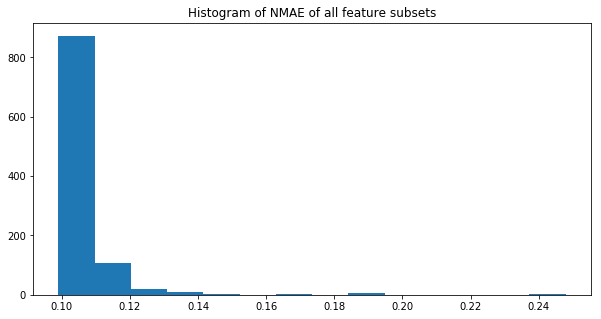

In [31]:
#change NMAE_10 from a float to a list
NMAE_10 = [NMAE_10]

#add all lists of NMAE
NMAE_list = NMAE_1 + NMAE_2 + NMAE_3+ NMAE_4 + NMAE_5 + NMAE_6 + NMAE_7 + NMAE_8 + NMAE_9 + NMAE_10

#change the total NMAE list to a series and calculate the difference between max NMAE and min NMAE
new_NMAE = pd.Series(NMAE_list) 
d = max(NMAE_list) - min(NMAE_list)
print(max(NMAE_list),min(NMAE_list),d)

# design the size of the figure.
plt.figure(figsize=(10,5))

#divide the entire range of values into bins intervals and count how many values fall into each interval. 
mem_bins = int(d/0.01)
plt.hist(new_NMAE,bins=mem_bins)
plt.title('Histogram of NMAE of all feature subsets')
plt.show()

In [32]:
from statistics import mean

#put all NMAE to a tuple, and the minimal value of each NMAE to another tuple too.
NMAE_tuple = ((NMAE_1),(NMAE_2),(NMAE_3),(NMAE_4),(NMAE_5),(NMAE_6),(NMAE_7),(NMAE_8),(NMAE_9),(NMAE_10))
min_NMAE = (min(NMAE_1),min(NMAE_2),min(NMAE_3),min(NMAE_4),min(NMAE_5),min(NMAE_6),min(NMAE_7),min(NMAE_8),min(NMAE_9),min(NMAE_10))

#get the most minimal NMAE among the minimal values and its location in the tuple
c = min_NMAE.index(min(min_NMAE))
m = min_NMAE[c]
print('The smallest erorr is :', m)

#use the location of minimal NMAE to map to the NMAE tuple, get the specific NMAE list that contains the min
n = NMAE_tuple[c].index(m)
# use the location of the minimal NMAE and the list it belongs to get the features
print(train_subsets[c][n])


The smallest erorr is : 0.09904634758386285
('plist-sz', 'ldavg-1', 'pgfree/s', 'file-nr', '%%memused')


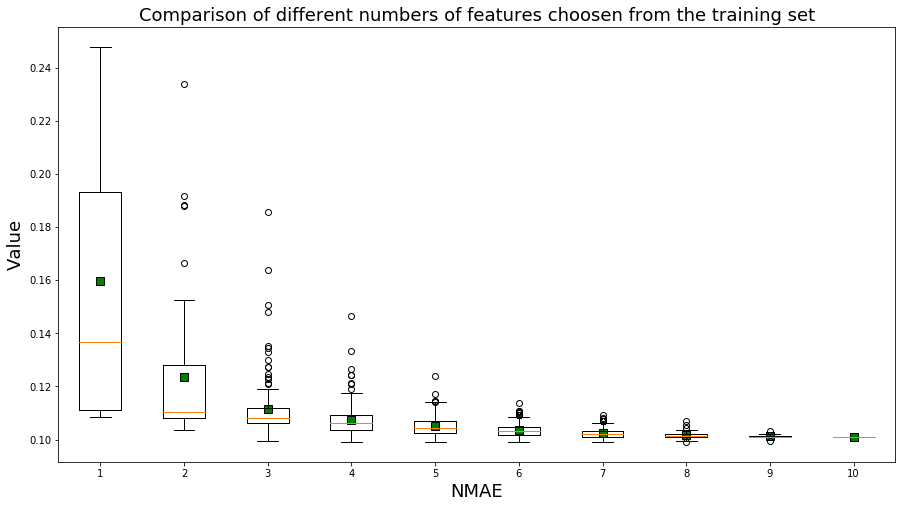

The execution time for Method 1 : 5.991


In [33]:
#Create a figure and a set of subplots.
fig, axes = plt.subplots(figsize=(15, 8))

axes.set_title('Comparison of different numbers of features choosen from the training set',fontsize = 18)
axes.set_xlabel('NMAE',fontsize = 18)
axes.set_ylabel('Value',fontsize = 18)

#draw the mean value as a small green box
plt.plot(1,mean(NMAE_1),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(2,mean(NMAE_2),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(3,mean(NMAE_3),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(4,mean(NMAE_4),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(5,mean(NMAE_5),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(6,mean(NMAE_6),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(7,mean(NMAE_7),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(8,mean(NMAE_8),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(9,mean(NMAE_9),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(10,mean(NMAE_10),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')

#draw the boxs of NMAE_1,NMAE_2,NMAE_3,NMAE_4,NMAE_5,NMAE_6,NMAE_7,NMAE_8,NMAE_9,NMAE_10
data = [NMAE_1,NMAE_2,NMAE_3,NMAE_4,NMAE_5,NMAE_6,NMAE_7,NMAE_8,NMAE_9,NMAE_10]
bp = axes.boxplot(data)

plt.show()

#get the end of computing time
end_1 = time.time()

#calculate the time interval
t1 = end_1-start_1
print ("The execution time for Method 1 : %.3f" % t1 )

In [34]:
start_2 = time.time()
dic = {}

#first get each feature from X_train, then do correlation with Y_train, then do squre
for v in X_features:
    a = X_train[v].corr(Y_train)
    dic[v] = a**2
    
# Sorting the value of the dictionary use key parameter, which can use lambda expressions
'''
The dic.items() converts dic into an iterable object, 
and the elements of the iterated object are ('plist-sz', 0.6998514463540798), ('totsck', 0.6978048098961416)..... 
and items() method converts the dictionary elements into tuples. 
The lambda expression means that the second element in the tuple is selected as the comparison parameter. 
Lambda x: x return value of the lambda function, so we can sort the value of the dictionary. 
Note that the sorted return value is a list, and the name-value pairs in the original dictionary 
are converted to tuples in the list.
'''
print(sorted(dic.items(), key=lambda item:item[1], reverse=True))

[('plist-sz', 0.6839622585562957), ('totsck', 0.6816854419709737), ('ldavg-1', 0.6503581806486128), ('runq-sz', 0.6382598971518761), ('file-nr', 0.5672880361563446), ('cswch/s', 0.5351157155862404), ('all_%%usr', 0.3016713338168554), ('%%memused', 0.28159702558400773), ('pgfree/s', 0.04857277224409475), ('proc/s', 0.04849713531210396)]


NMAE for ten feature sets:  [0.1084250056756054, 0.10842161751551127, 0.1081582833831261, 0.10619938793593137, 0.1060426926986686, 0.10525607070495246, 0.10312044339479216, 0.09988217902912853, 0.10107676971424362, 0.10094270178420878]


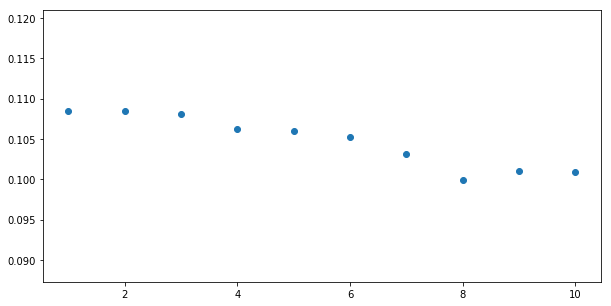

In [35]:
#get keys of the direction in order to a list
feature_list = list(dic.keys())

#define a list contains ten items
sub_list = [None]*10
NMAE = [None]*10

# loop i from 1 to 10
for i in range(1,11):
    #get the top i features and put in one item of the list
    sub_list[i-1] = feature_list[:i]
    #fit the linear regression using top i features of X with Y train
    regr.fit(X_train[sub_list[i-1]],Y_train)
    #predic with top i features of X test
    Y_predic = regr.predict(X_test[sub_list[i-1]])
    #calculate the NMAE and put into the list
    NMAE[i-1] = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
print('NMAE for ten feature sets: ',NMAE)

#draw scatter diagram
#create a list range from 1 to 10 as the tick of x axis
nlist = range(1,11)

# design the size of the figure.
plt.figure(figsize=(10,5))
axes.set_title('NMAE for ten feature sets',fontsize = 18)
axes.set_xlabel('num of features',fontsize = 18)
axes.set_ylabel('NMAE values',fontsize = 18)

#draw scatter diagram with x-coordinate nlist and y-coordinate NMAE
plt.scatter(nlist,NMAE)
plt.show()

      

In [36]:
#Compute pairwise correlation of columns, return DataFrames
train.corr()


,plist-sz,totsck,ldavg-1,pgfree/s,proc/s,all_%%usr,file-nr,cswch/s,%%memused,runq-sz,DispFrames
plist-sz,1.000000,0.998907,0.972944,-0.220519,0.246952,0.712600,0.850404,0.857706,0.742683,0.952002,-0.827020
totsck,0.998907,1.000000,0.970935,-0.200810,0.249904,0.720720,0.845803,0.861365,0.737527,0.952228,-0.825642
ldavg-1,0.972944,0.970935,1.000000,-0.244175,0.242830,0.719663,0.874338,0.872440,0.752651,0.939797,-0.806448
pgfree/s,-0.220519,-0.200810,-0.244175,1.000000,-0.028089,0.227423,-0.274450,-0.045584,-0.218296,-0.150069,0.220392
proc/s,0.246952,0.249904,0.242830,-0.028089,1.000000,0.182381,0.180864,0.208908,0.138376,0.235891,-0.220221
all_%%usr,0.712600,0.720720,0.719663,0.227423,0.182381,1.000000,0.587767,0.893401,0.518561,0.774570,-0.549246
file-nr,0.850404,0.845803,0.874338,-0.274450,0.180864,0.587767,1.000000,0.776558,0.641068,0.838459,-0.753185
cswch/s,0.857706,0.861365,0.872440,-0.045584,0.208908,0.893401,0.776558,1.000000,0.590770,0.898803,-0.731516
%%memused,0.742683,0.737527,0.752651,-0.218296,0.138376,0.518561,0.641068,0.590770,1.000000,0.708434,-0.530657
runq-sz,0.952002,0.952228,0.939797,-0.150069,0.235891,0.774570,0.838459,0.898803,0.708434,1.000000,-0.798912


[Text(1,0,'x1'),
 Text(2,0,'x2'),
 Text(3,0,'x3'),
 Text(4,0,'x4'),
 Text(5,0,'x5'),
 Text(6,0,'x6'),
 Text(7,0,'x7'),
 Text(8,0,'x8'),
 Text(9,0,'x9'),
 Text(10,0,'x10')]

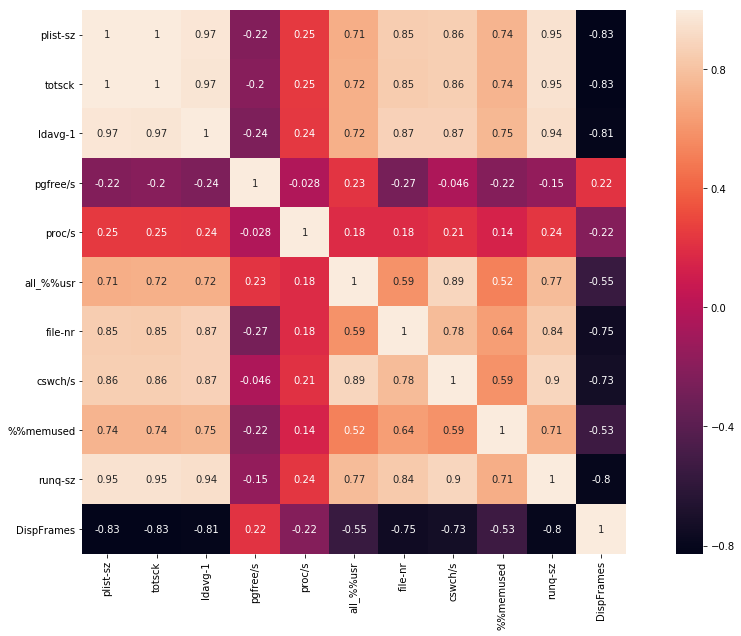

In [37]:
import seaborn as sns
# design the size of the figure.
plt.figure(figsize=(18,10))

#Plot heatmap: plot rectangular data as a color-encoded matrix
#annot: If True, write the data value in each cell.
#square: If True, set the Axes aspect to “equal” so each cell will be square-shaped.
#xticklabels, yticklabels: If True, plot the column names of the dataframe.
sns.heatmap(train.corr(),annot=True, xticklabels= True, yticklabels= True, square=True)
axes.set_yticklabels(['x1', 'x2', 'x3', 'x4', 'x5','x6','x7','x8','x9','x10','y'], fontsize = 18)
axes.set_xticklabels(['x1', 'x2', 'x3', 'x4', 'x5','x6','x7','x8','x9','x10','y'], fontsize = 18)

In [38]:
end_2 = time.time()
t2 = end_2-start_2
print ("The execution time for Method 1 : %.3f" % t2)

The execution time for Method 1 : 1.128
